# Heart Disease Prediction.

The notebook has all the ideas for resolving the *binary classification* problem about patients having heart disease or not.

The steps for the workflow:

1. Problem definition.
2. Data preparation.
3. Evaluation of project.
4. Features analysis.
5. Modelling an algorithm.
    1. **LogisticRegression**.
    2. **RandomForestClassifier**.
    3. **KNeighboursClassifier**.


## 1. Problem definition.

The purpose of the project is to identify whether a patient has a heart disease or not, given the clinical data from hospital.

## 2. Data.

The data is taken from: https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation.

If the model reaches 95% accuracy at predicting the heart disease, it is considered to be successful.

## 4. Features.

The explicit description below covers all the data features:

1. age - age in years.
2. sex - (1 = male; 0 = female).
3. cp - chest pain type.
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital).
5. chol - serun cholesterl in mg/dl.
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false).
7. restecg - resting electrocardiographic results.
8. thalach - maximum heart rate achieved.
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest.
11. slope - the slope of the peak exercise ST segment.
12. ca - number of major vessels (0-3) coloured by flourosopy.
13. thal - heart rate (3 = normal; 6 = fixed defect; 7 = reversible defect).
14. target - have disease or not (0 = no; 1 = yes).


### Preparing the tools.

In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations (for classification problem)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Saving model
import pickle

### Load Data.

In [2]:
df = pd.read_csv("heart-disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### EDA (Exploratory Data Analysis).

The goal of that minisection is to elaborate more on data features present in the dataset.

1. Target values.
    * bar chart.
    * check NaN values.
2. Heart disease frequency according to Sex.
    * bar chart.
3. Age vs. Max heart rate (thalach).
    * scatter plot.
    * histogram for age distribution.
4. Heart disease frequency vs. Chest pain type (cp).
    * bar chart.
5. Correlation matrix.
    * heatmap.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

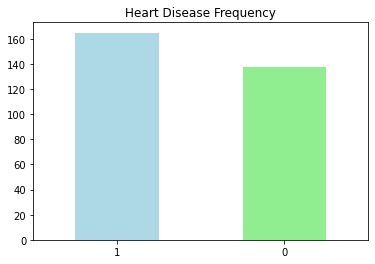

In [4]:
# Target values:
df["target"].value_counts().plot(kind='bar', color=["lightblue", "lightgreen"], title="Heart Disease Frequency")
plt.xticks(rotation=0)

In [5]:
df.isna().sum()  # No missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex.

In [6]:
df.sex.value_counts() # 0 = Female; 1 = Male

1    207
0     96
Name: sex, dtype: int64

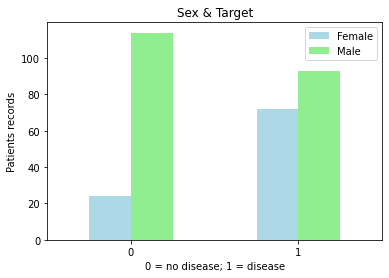

In [7]:
bar = pd.crosstab(df["target"], df["sex"]).plot(kind='bar',
                                          color=['lightblue', 'lightgreen'],
                                          title='Sex & Target')
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.ylabel("Patients records")
plt.xlabel("0 = no disease; 1 = disease");

### Age vs. Max Heart Rate.

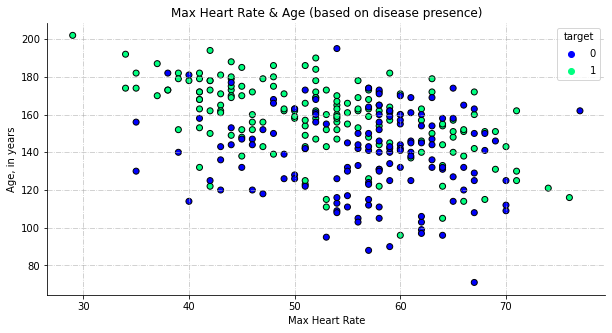

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

x = df["age"]
y = df["thalach"]
c = df["target"]

scatter = ax.scatter(x=x, y=y, c=c, cmap='winter', edgecolors='black')
ax.set(title="Max Heart Rate & Age (based on disease presence)",
       xlabel="Max Heart Rate",
       ylabel="Age, in years")

ax.grid(b=True, alpha=0.7, linestyle='-.')
ax.spines[["top", "right"]].set_visible(False)
ax.legend(*scatter.legend_elements(), title='target', loc='best');

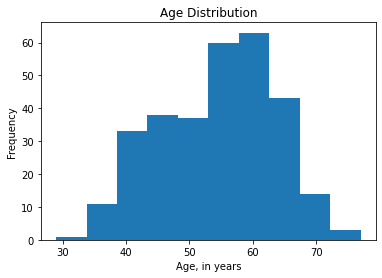

In [9]:
df["age"].plot(kind='hist', bins=10);
plt.title("Age Distribution")
plt.xlabel("Age, in years");

### Heart Disease Frequency against chest pain type (cp).

cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [10]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


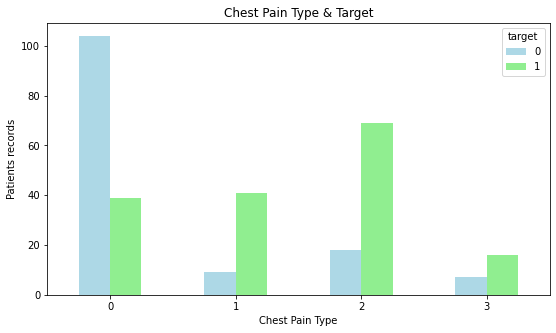

In [11]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   color=['lightblue', 'lightgreen'],
                                   title='Chest Pain Type & Target',
                                   figsize=(9, 5))

plt.xlabel("Chest Pain Type")
plt.ylabel("Patients records")
plt.xticks(rotation=0);

### Correlation Matrix.

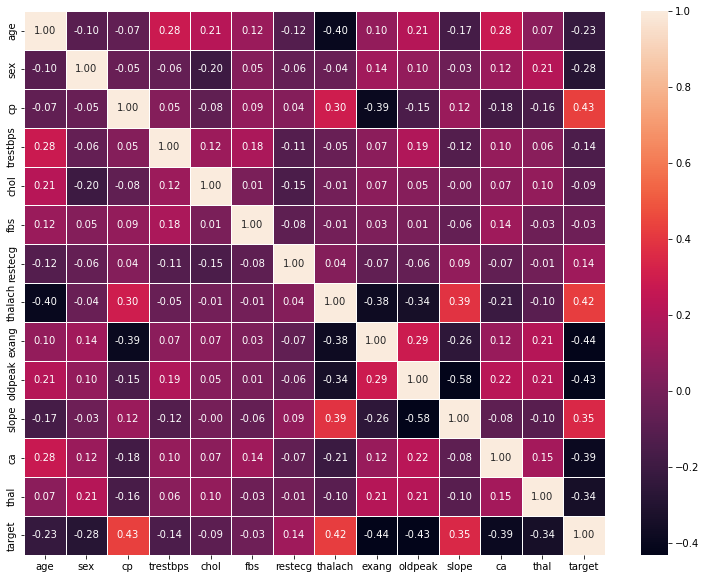

In [12]:
corr_mat = df.corr()

fig, ax = plt.subplots(figsize=(13, 10))

ax = sns.heatmap(data=corr_mat,
                 annot=True,
                 robust=True,
                 linewidths=1,
                 fmt=".2f")

## 5. Modelling.

In [13]:
# Setup a random seed
np.random.seed(4)

# Split into training and test data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

3 different machine learning **classification** estimators will be tested:

1. LogisticRegression.
2. KNeighborsClassifier.
2. RandomForestClassifier.

The listed esimators are chosen preferrably referring to the scikit-learn estimators roadmap: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [14]:
# Creating dictionary for baseline models:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}


def fit_and_score_model(estimators: dict, X_train, X_test, y_train, y_test):
    """
    Fits models in given list and scores them, returning a llist of scores.
    
    ----------
    
    models: dictionary of sklearn estimators.
    X_train: X training set.
    X_test: X testing set.
    y_train: y training set.
    y_test: y testing set.
    """
    
    np.random.seed(4)
    
    models_scores = {}
    
    # Decomposition of 
    for name, clf in models.items():
        score = clf.fit(X_train, y_train).score(X_test, y_test)
        models_scores[name] = score
        
    return models_scores


scores = fit_and_score_model(estimators=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

scores

/Users/vagiz/Desktop/desktop_vagiz/Programming/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.9016393442622951,
 'KNeighborsClassifier': 0.5737704918032787,
 'RandomForestClassifier': 0.8688524590163934}

### Algorithms Comparison.

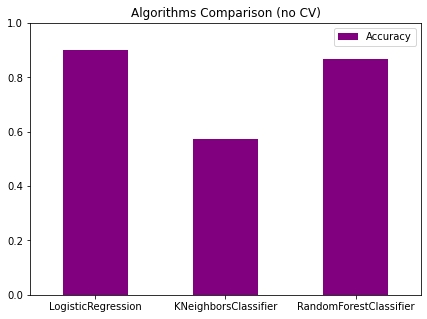

In [15]:
scores_df = pd.DataFrame(scores, index=["Accuracy"])
scores_df.T.plot(kind='bar',
                 color=['purple'],
                 title='Algorithms Comparison (no CV)',
                 align='center',
                 figsize=(7,5))
plt.xticks(rotation=0)
plt.ylim([0, 1]);

The next steps will be devoted to in depth metrics analysis of models. Also, some adjustments in hyperparameters will be made according to model's performance.

Process:
* Changing **major hyperparameters** by hand to see the calibrations of `score` method.
* RansomizedSearchCV and GridSearchCV (structural calibration).
* Feature importance.
* Confusion matrix, classificatoin report.
* Precision, recall, F1 score.
* Cross-validation
* ROC curve and area under it (AUC).

## Hyperparameters 1.

1. `n_neighbors` hyperparameter of **KNeighborsClassifier**  could be tuned to see the changing trends of training score and testing score.
2. Tune **LogisticRegression** and **RandomForestClassifier** with `RandomizedSarchCV` and `GridSearchCV`.

### KNN

Maximum KNN test score is: 72.13%


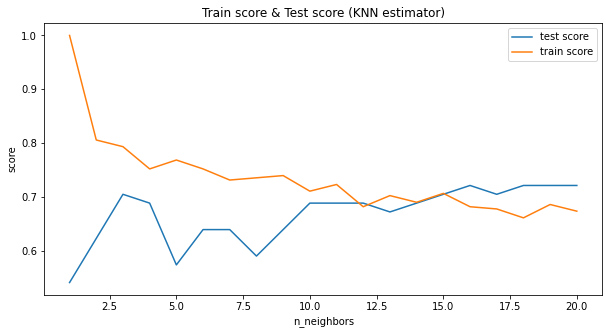

In [16]:
np.random.seed(4)

# Make KNN model and adjust params
knn = KNeighborsClassifier()

train_scores = []
test_scores = []

neighbors = range(1, 21)

for n in neighbors:
    knn.set_params(n_neighbors=n)
    
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(neighbors, test_scores, label="test score")
ax.plot(neighbors, train_scores, label="train score")
ax.set(title="Train score & Test score (KNN estimator)",
       xlabel="n_neighbors",
       ylabel="score")
ax.legend();

print(f"Maximum KNN test score is: {max(test_scores) * 100:.2f}%")

### LogisticRegression & RandomForestClassifier.

#### RandomizedSearchCV.

Using 5-fold cross-validation ensures we have no *overfitting*.

In [17]:
# Grid for LR

lr_grid = {"C": np.logspace(-10, 10, 100),
           "solver": ["liblinear"]}

# Grid for RF
rf_grid = {"n_estimators": [10, 100, 200, 400, 800, 1000],
           "max_depth": [None, 5, 10, 20, 30],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [18]:
# LogisticRegression

np.random.seed(4)

rs_lr = RandomizedSearchCV(estimator=LogisticRegression(),
                           param_distributions=lr_grid,
                           cv=5,
                           n_iter=100,
                           verbose=1)

rs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [19]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 20.565123083486515}

In [20]:
print(f"The accuracy of LogisticRegression model is: {rs_lr.score(X_test, y_test)* 100:.2f}%")

The accuracy of LogisticRegression model is: 86.89%


In [21]:
y_preds = rs_lr.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



LogisticRegression is quite straghtforward model, even with 500 fits it works very fast. In that particular case, there is no difference between GridSearchCV and RandomizedSearchCV since `n_iter` hyperparameter in RandomizedSearchCV is equal to overall maximum number of iterations.

In [22]:
# RandomForestClassifier

np.random.seed(4)

rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 100, 200, 400, 800,
                                                         1000]},
                   verbose=True)

In [23]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [24]:
print(f"The accuracy of RandomForestClassifier (RSCV) is: {rs_rf.score(X_test, y_test) * 100:.2f}%")

The accuracy of RandomForestClassifier (RSCV) is: 91.80%


#### GridSeachCV

Using the hyperparameter intervals near best params.

In [25]:
rf_grid_2 = {
    "n_estimators": [80, 90, 100, 110, 120],
    "min_samples_split": [3, 4, 5],
    "min_samples_leaf": [6, 7, 8],
    "max_depth": [5, 10]
}

gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=rf_grid_2,
                     cv=5,
                     verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=True)

In [26]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 90}

In [27]:
print(f"The accuracy of RandomForestClassifier (GSCV) is: {gs_rf.score(X_test, y_test) * 100:.2f}%")

The accuracy of RandomForestClassifier (GSCV) is: 91.80%


In [28]:
y_preds = gs_rf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



### Hyperparameters conclusion 1.

Based on first modelling (here, all accuracies are instances of cross-validation):

1. KNN accuracy does not exceed 75%, so it is not the best option. KNN is excluded from models list.
2. LogisticRegression accuracy is about 87%, which is good, but 8% difference with minimum accuracy required for a model to be considered successfull must be adjusted. Since `rs_lr` has only 2 hyperparameters, their number will be increased: `max_iter` and `penalty` hyperparameters will be tested as well.
3. RandomForestClassifier has a good accuracy of approximately 92%, which is close to 95%. For now, this model is in favour.

Next step is to analyze **feature importance** for 2 models: LogisticRegression and RandomForestClassifier.


### Feature Importance.

**LogisticRegression**

In [29]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 20.565123083486515}

In [30]:
# Sample LR
lr_s = LogisticRegression(C=20.565123083486515,
                          solver='liblinear')

lr_s.fit(X_train, y_train)

LogisticRegression(C=20.565123083486515, solver='liblinear')

In [31]:
# Visualize features and their coefficients
features = df.columns
features_coefs = lr_s.coef_[0]

features_df = pd.DataFrame(dict(zip(features, features_coefs)),
                           index=['Coefficient of features in decision function (LR)'])
features_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Coefficient of features in decision function (LR),-0.001093,-1.608129,0.803948,-0.020513,-0.002714,0.192709,0.528129,0.019743,-0.750923,-0.61227,0.656924,-0.739399,-0.746985


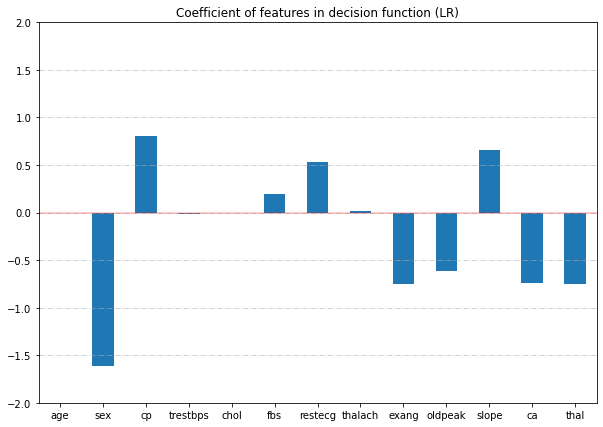

In [32]:
bar = features_df.T.plot.bar(title=features_df.index[0],
                       legend=False,
                       figsize=(10, 7),
                       label=False)
plt.grid(b=True, axis="y",linestyle='-.', alpha=0.7)
plt.xticks(rotation=0);
plt.ylim((-2, 2))
plt.axhline(y=0, linewidth=0.4, color="red");

**NOTE**: The following correlation is about linear relationship, it has nothing to do with non-linear relationships, and therefore is reasonably computed using **LogisticRegression** coefficients.

Positive correlation between two variables means that as first variable increases, the second one increases as well. Negative correlation between two variables means that as first variable increases, the second one decreases.

The *absolute value* of coefficients determines the actual correlation between variables: low absolute coefficient (<<1, like 0.05) indicates small change of one variable given big change in the second variable, and vice versa, high absolute coefficient (>>1, like 100) indicates big change in one variable given little change of the second variable (uncommon situation).

In **feature engineering**, the variables with 0 correlation coefficients could be removed since they have no positive influence on model's performance (again, on *linear* model's performance).

Example:

`age`, `trestbps`, `chol`, and `thalach` have very low impact on model predictions, thus they could be deleted from LogisticRegression model training.

**RandomForestClassifier**

First step - simple usage of `model.feature_importances_`, an attribute of forest of trees.

In [33]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 90}

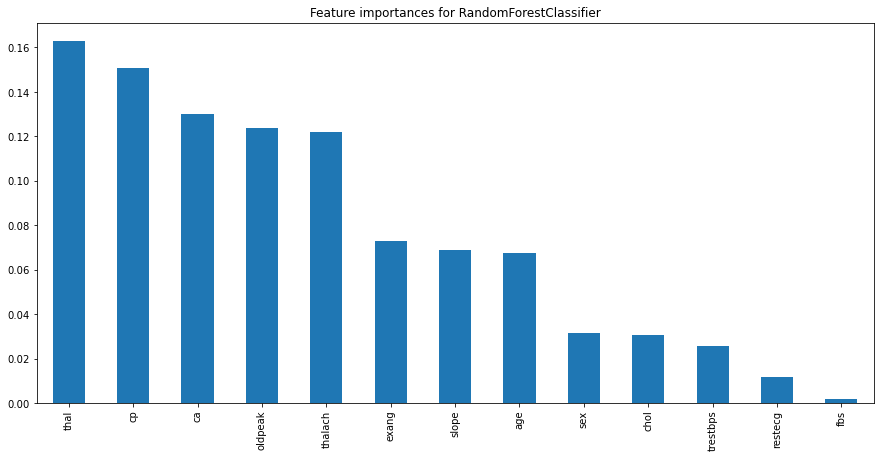

In [34]:
np.random.seed(4)

# Using best hyperparameters received from GridSearchCV
forest = RandomForestClassifier(n_estimators=90,
                                max_depth=5,
                                min_samples_leaf=6,
                                min_samples_split=5)

forest.fit(X_train, y_train)

importances = forest.feature_importances_
features = X.columns

forest_features = pd.DataFrame(dict(zip(features, importances)), index=["Importance"]).T
forest_features.sort_values("Importance", ascending=False).plot(kind='bar',
                                                        title='Feature importances for RandomForestClassifier',
                                                        legend=False,
                                                        figsize=(15, 7))
plt.xticks(rotation=90);

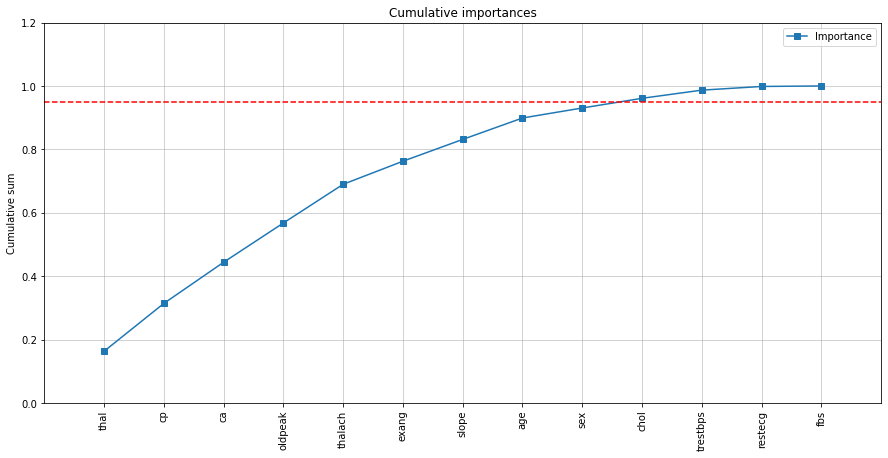

In [35]:
# Drawing cumulative importance
forest_features.sort_values("Importance", ascending=False, inplace=True)

sum = [0]
for i in range(len(forest_features)):
    sum.append(sum[i] + forest_features.T[forest_features.index[i]])
    
forest_features_cum_sum = pd.DataFrame(dict(zip(forest_features.index, sum[1:])))
forest_features_cum_sum.T.plot(title="Cumulative importances",
                               figsize=(15, 7),
                               marker='s',
                               ylabel="Cumulative sum")

plt.xticks(ticks=range(len(features)), labels=forest_features.index)
plt.grid(b=True, alpha=0.7)
plt.xlim((-1,13))
plt.ylim(0,1.2)
plt.axhline(y=0.95, color='red', linestyle='--', label=True)
plt.xticks(rotation=90);

As represents the graph above, several features have overall contribution less than 5% (**red** line is 95% threshold).
## Hyperparameters 2.

### LogisticRegression.

In [36]:
# Add 2 hyperparameters
np.random.seed(4)

lr_grid_3 = {
    "solver": ["liblinear"],
    "C": np.logspace(-5, 5, 30),
    "max_iter": [100, 200, 500, 1000, 2000],
    "penalty": ["l1", "l2"]
}

rs_lr_2 = RandomizedSearchCV(estimator=LogisticRegression(),
                             param_distributions=lr_grid_3,
                             n_iter=150,
                             cv=5,
                             verbose=True)

rs_lr_2.fit(X_train, y_train)
rs_lr_2.score(X_test, y_test), rs_lr_2.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


(0.8688524590163934,
 {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 100000.0})

In [37]:
# Fit one more time around
lr_grid_4 = {
    "solver": ["liblinear"],
    "max_iter": [80, 100, 120, 140, 160],
    "C": np.logspace(-5, 5, 30)
}

gs_lr_2 = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=lr_grid_4,
                       cv=5,
                       verbose=True)

gs_lr_2.fit(X_train, y_train)
gs_lr_2.score(X_test, y_test), gs_lr_2.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


(0.8688524590163934,
 {'C': 16.102620275609425, 'max_iter': 80, 'solver': 'liblinear'})

As a conclusion, using various hyperparameters settings, **LogisticRegression** estimator is not capable of cross-validated accuracy score of more than 87%. Thus, the remaining estimator is **RandomForestClassifier**.

### RandomForestClassifier

In [38]:
# Add hyperparameters
np.random.seed(4)

rf_grid_3 = {
    "n_estimators": [250, 300, 350, 400],
    "max_depth": [None, 20, 25],
    "min_samples_split": np.arange(10, 20, 2),
    "min_samples_leaf": np.arange(8, 20, 2),
    "max_features": ["sqrt"],
    "criterion": ["entropy"],
    "n_jobs": [-1],
    "random_state": [4],
    "min_impurity_decrease": [0.03, 0.05]
}

rs_rf_2 = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=rf_grid_3,
                             n_iter=30,
                             cv=5,
                             verbose=True)

rs_rf_2.fit(X_train, y_train)
rs_rf_2.score(X_test, y_test), rs_rf_2.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


(0.9344262295081968,
 {'random_state': 4,
  'n_jobs': -1,
  'n_estimators': 300,
  'min_samples_split': 10,
  'min_samples_leaf': 10,
  'min_impurity_decrease': 0.03,
  'max_features': 'sqrt',
  'max_depth': 20,
  'criterion': 'entropy'})

In [39]:
np.random.seed(4)

y_preds = rs_rf_2.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.92      0.97      0.95        36

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



In [40]:
np.random.seed(4)

rf_grid_3 = {
    "n_estimators": [280, 300, 320],
    "max_depth": [None, 20],
    "min_samples_split": [10, 12],
    "min_samples_leaf": [10, 15],
    "max_features": ["sqrt"],
    "criterion": ["entropy"],
    "n_jobs": [-1],
    "random_state": [4],
    "min_impurity_decrease": [0.025, 0.03, 0.035]
}

gs_rf_2 = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=rf_grid_3,
                       cv=5,
                       verbose=True)

gs_rf_2.fit(X_train, y_train)
gs_rf_2.score(X_test, y_test), gs_rf_2.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


(0.9344262295081968,
 {'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_impurity_decrease': 0.025,
  'min_samples_leaf': 15,
  'min_samples_split': 10,
  'n_estimators': 300,
  'n_jobs': -1,
  'random_state': 4})

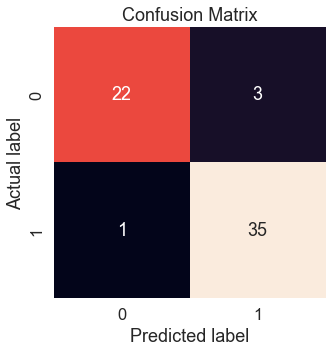

In [41]:
# Confusion matrix
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False,
                 square=True)
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="Actual label");

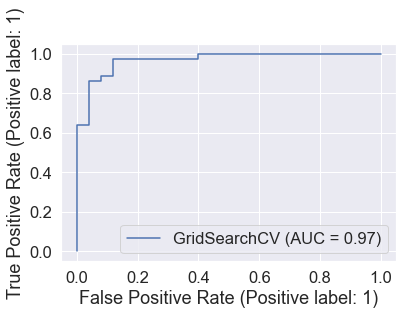

In [42]:
# ROC curve
RocCurveDisplay.from_estimator(gs_rf_2, X_test, y_test);

## Conclusion.

The purpose of project is not completed since there is only **93.44%** CV accuracy. Out of three models, `RandomForestClassifier` has the best performance. Logically, this estimator works great with *non-linear* relationships and therefore is beyond `LogisticRegression` (*linear* model) and `KNeighborsClassifier`.